# TIME ARIMA

In [1]:
import itertools

import numpy as np
from statsmodels.tsa.arima.model import ARIMA

from utils import time_plot, plot_arma_process, stationarity_tests, get_figure, acf_plot, pacf_plot
from data import get_apple_5y, get_switzerland_temperature

## Autoregressive process

AR(1) $x_t = -\frac{1}{7}x_{t-1}+w_t$
AR(1) AR roots: [-7.]
AR(1) is stationary: True
AR(2) $x_t = \frac{3}{2}x_{t-1}-\frac{1}{2}x_{t-2}+w_t$
AR(2) AR roots: [1. 2.]
AR(2) is stationary: False
AR(3) $x_t = \frac{5}{6}x_{t-1}+\frac{1}{6}x_{t-2}-\frac{1}{6}x_{t-3}+w_t$
AR(3) AR roots: [-2.30277564  1.30277564  2.        ]
AR(3) is stationary: True
AR(4) $x_t = \frac{5}{4}x_{t-2}-\frac{1}{4}x_{t-4}+w_t$
AR(4) AR roots: [-2. -1.  1.  2.]
AR(4) is stationary: True


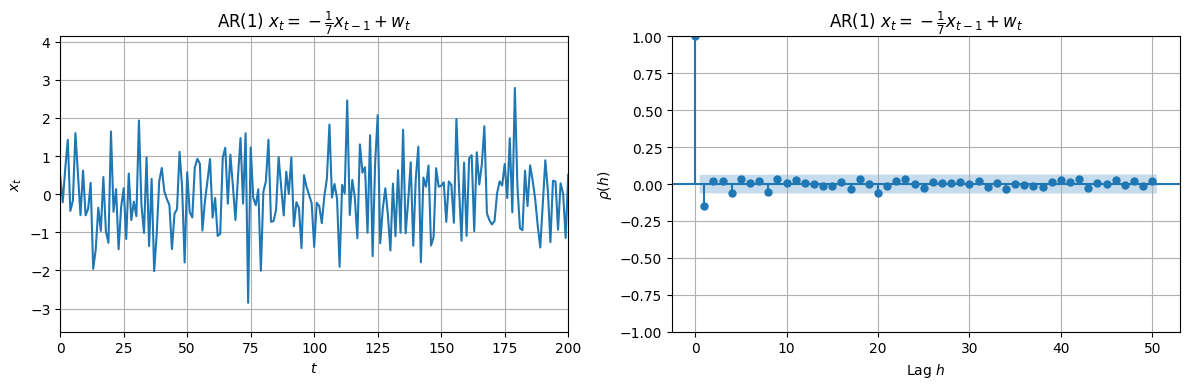

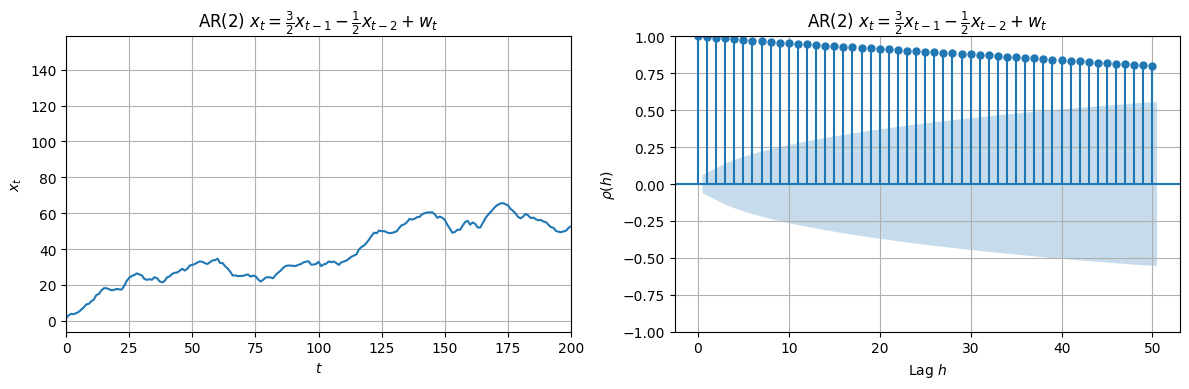

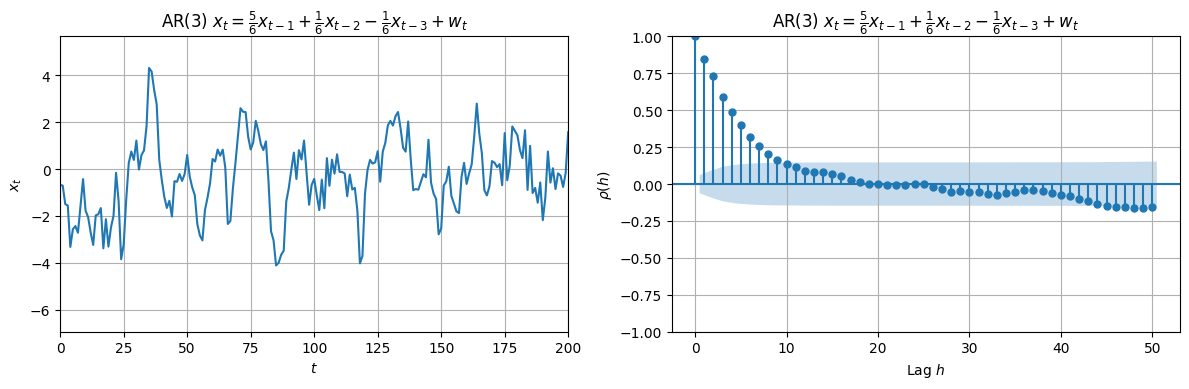

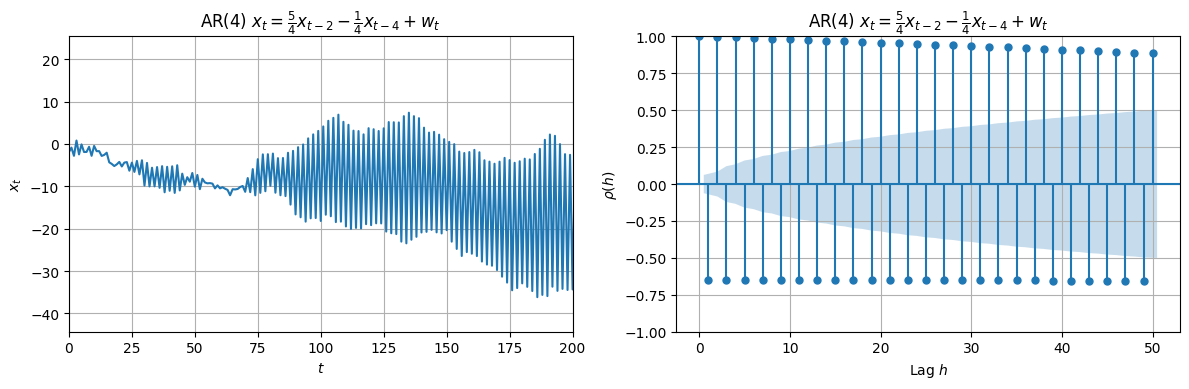

In [2]:
np.random.seed(42)
# AR coeffs Note: coefficients are in the form of the characteristic polynomial
# first coefficient for the zero-lag term
ar_parameters = [
    ([1, 1/7], '$x_t = -\\frac{1}{7}x_{t-1}+w_t$'),
    ([1, -3/2, 1/2], '$x_t = \\frac{3}{2}x_{t-1}-\\frac{1}{2}x_{t-2}+w_t$'),
    ([1, -5/6, -1/6, 1/6], '$x_t = \\frac{5}{6}x_{t-1}+\\frac{1}{6}x_{t-2}-\\frac{1}{6}x_{t-3}+w_t$'),
    ([1, 0, -5/4, 0, 1/4], '$x_t = \\frac{5}{4}x_{t-2}-\\frac{1}{4}x_{t-4}+w_t$'),
]
for ar_coeffs, formula in ar_parameters:
    plot_arma_process(ar_coeffs, [1], formula, acf_or_pacf=True)

### Partial Autocorrelation Function (PACF)

AR(1) $x_t = -\frac{1}{7}x_{t-1}+w_t$
AR(1) AR roots: [-7.]
AR(1) is stationary: True
AR(2) $x_t = \frac{3}{2}x_{t-1}-\frac{1}{2}x_{t-2}+w_t$
AR(2) AR roots: [1. 2.]
AR(2) is stationary: False
AR(3) $x_t = \frac{5}{6}x_{t-1}+\frac{1}{6}x_{t-2}-\frac{1}{6}x_{t-3}+w_t$
AR(3) AR roots: [-2.30277564  1.30277564  2.        ]
AR(3) is stationary: True
AR(4) $x_t = \frac{5}{4}x_{t-2}-\frac{1}{4}x_{t-4}+w_t$
AR(4) AR roots: [-2. -1.  1.  2.]
AR(4) is stationary: True


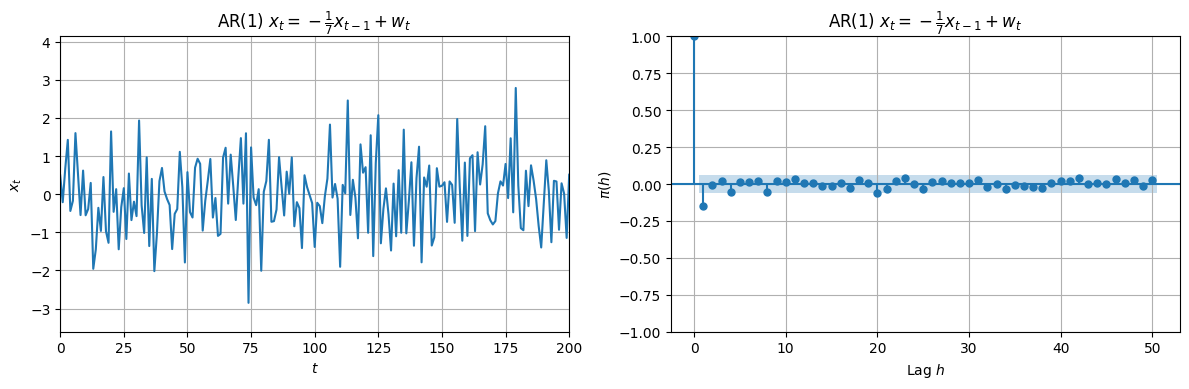

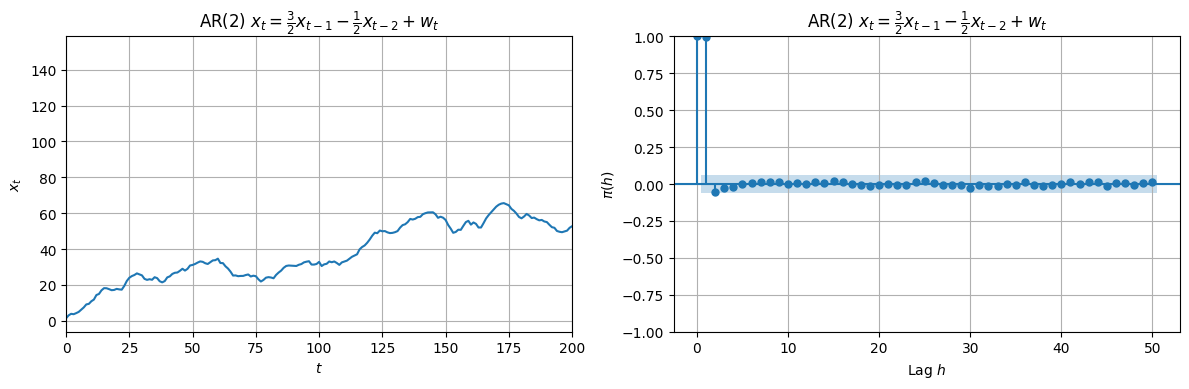

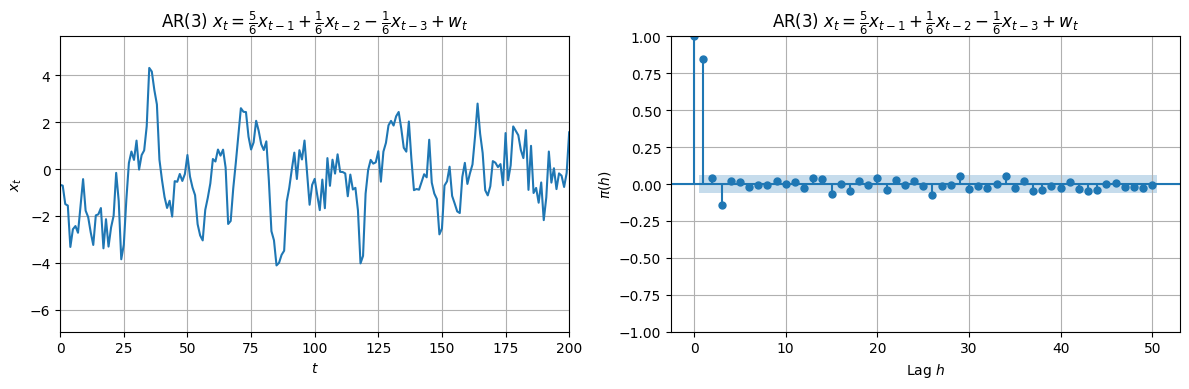

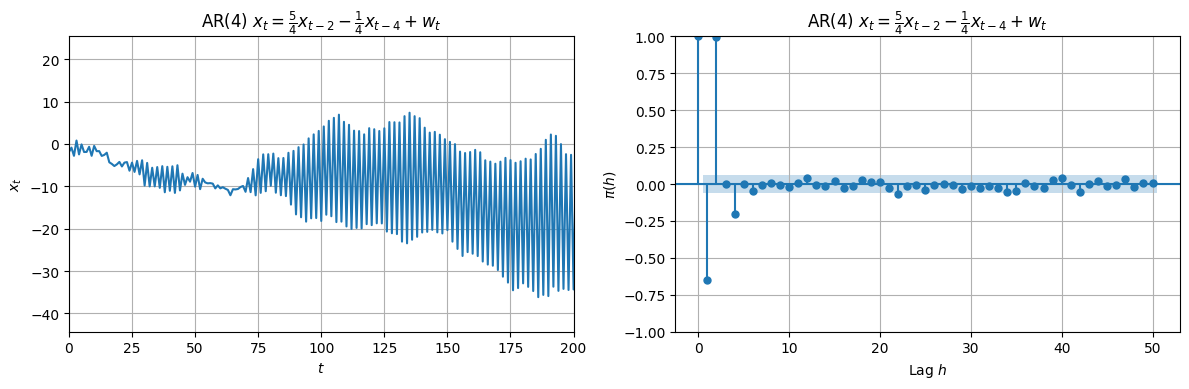

In [3]:
np.random.seed(42)
for ar_coeffs, formula in ar_parameters:
    plot_arma_process(ar_coeffs, [1], formula, acf_or_pacf=False)

## Moving Average process

MA(1) $x_t = w_t-\frac{1}{2}w_{t-1}$
MA(1) MA roots: [2.]
MA(1) is invertible: True
MA(2) $x_t = w_t-w_{t-1}-\frac{3}{4}w_{t-2}$
MA(2) MA roots: [-2.          0.66666667]
MA(2) is invertible: False
MA(3) $x_t = w_t-\frac{1}{2}w_{t-1}-\frac{1}{9}w_{t-2}+\frac{1}{18}w_{t-3}$
MA(3) MA roots: [-3.  2.  3.]
MA(3) is invertible: True
MA(4) $x_t = w_t-w_{t-1}-3w_{t-2}+w_{t-3}+2w_{t-4}$
MA(4) MA roots: [-1. -1.68731824e-08j -1. +1.68731824e-08j  0.5+0.00000000e+00j
  1. +0.00000000e+00j]
MA(4) is invertible: False


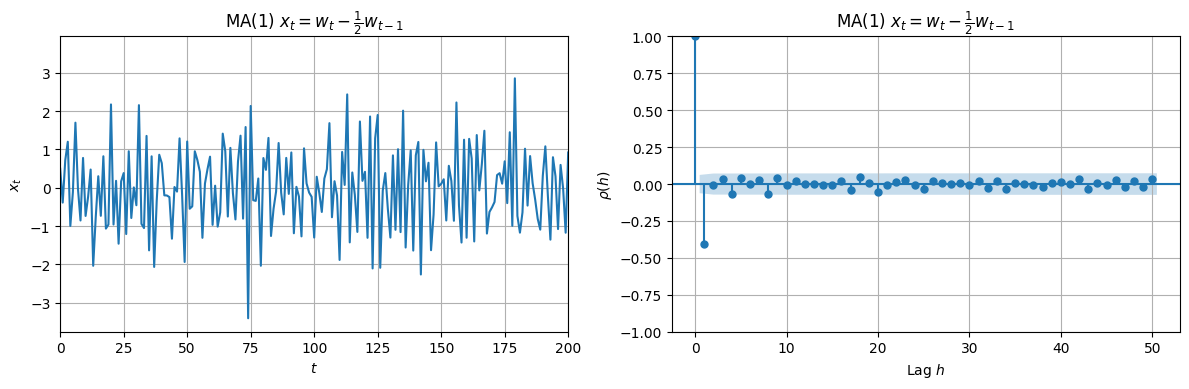

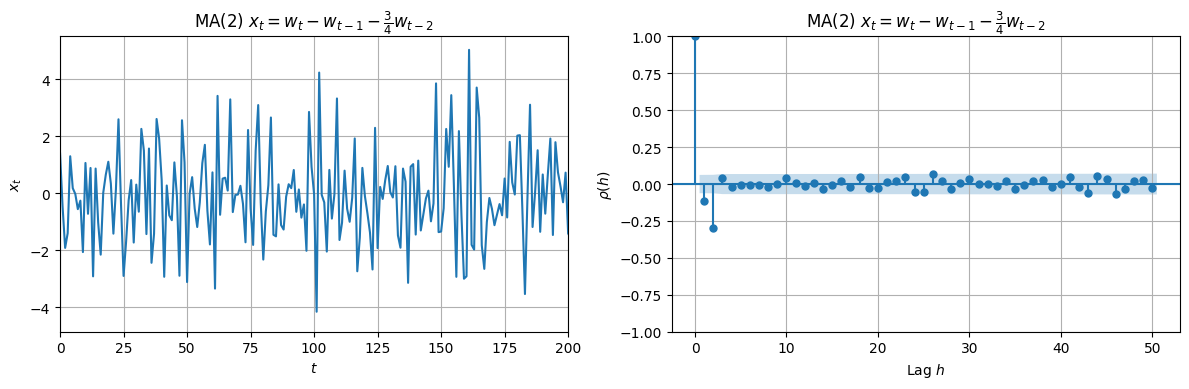

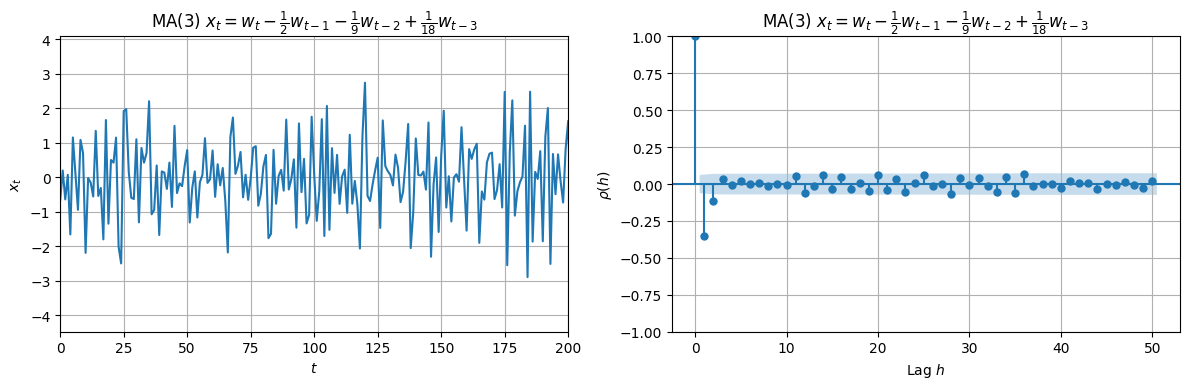

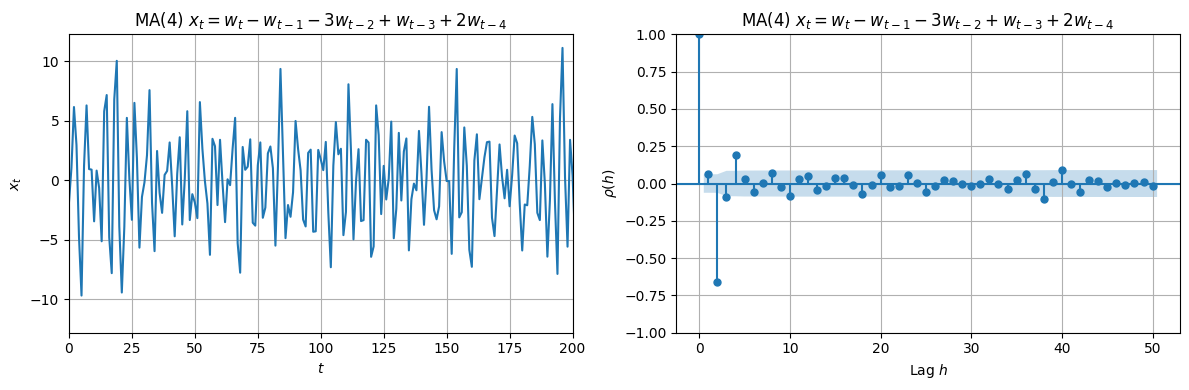

In [4]:
np.random.seed(42)
# MA coeffs Note: coefficients are in the form of the characteristic polynomial
# first coefficient for the zero-lag term
ma_parameters = [
    ([1, -1/2], '$x_t = w_t-\\frac{1}{2}w_{t-1}$'),
    ([1, -1, -3/4], '$x_t = w_t-w_{t-1}-\\frac{3}{4}w_{t-2}$'),
    ([1, -1/2, -1/9, 1/18], '$x_t = w_t-\\frac{1}{2}w_{t-1}-\\frac{1}{9}w_{t-2}+\\frac{1}{18}w_{t-3}$'),
    ([1, -1, -3, 1, 2], '$x_t = w_t-w_{t-1}-3w_{t-2}+w_{t-3}+2w_{t-4}$'),
]
for ma_coeffs, formula in ma_parameters:
    plot_arma_process([1], ma_coeffs, formula, acf_or_pacf=True)

### Partial Autocorrelation Function (PACF)

MA(1) $x_t = w_t-\frac{1}{2}w_{t-1}$
MA(1) MA roots: [2.]
MA(1) is invertible: True
MA(2) $x_t = w_t-w_{t-1}-\frac{3}{4}w_{t-2}$
MA(2) MA roots: [-2.          0.66666667]
MA(2) is invertible: False
MA(3) $x_t = w_t-\frac{1}{2}w_{t-1}-\frac{1}{9}w_{t-2}+\frac{1}{18}w_{t-3}$
MA(3) MA roots: [-3.  2.  3.]
MA(3) is invertible: True
MA(4) $x_t = w_t-w_{t-1}-3w_{t-2}+w_{t-3}+2w_{t-4}$
MA(4) MA roots: [-1. -1.68731824e-08j -1. +1.68731824e-08j  0.5+0.00000000e+00j
  1. +0.00000000e+00j]
MA(4) is invertible: False


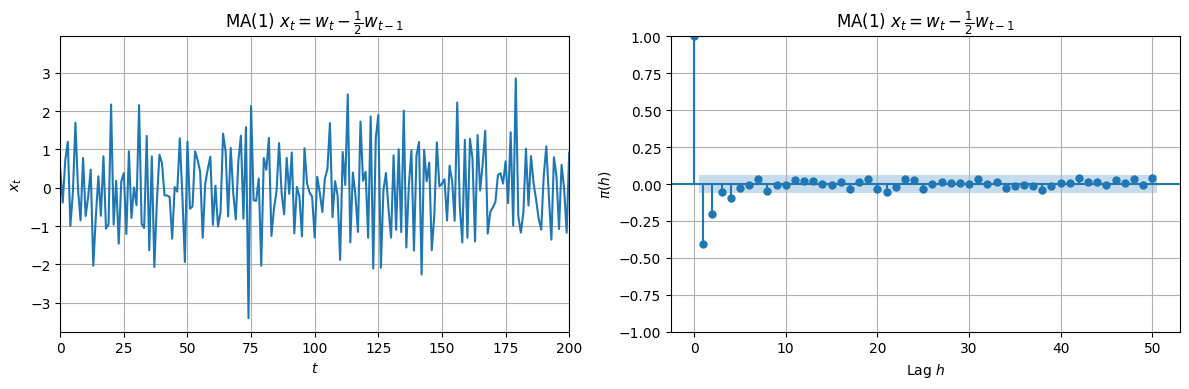

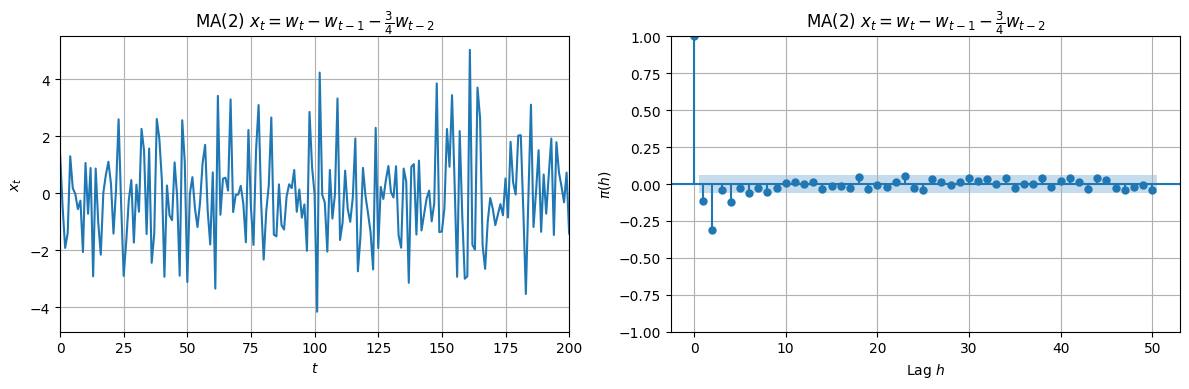

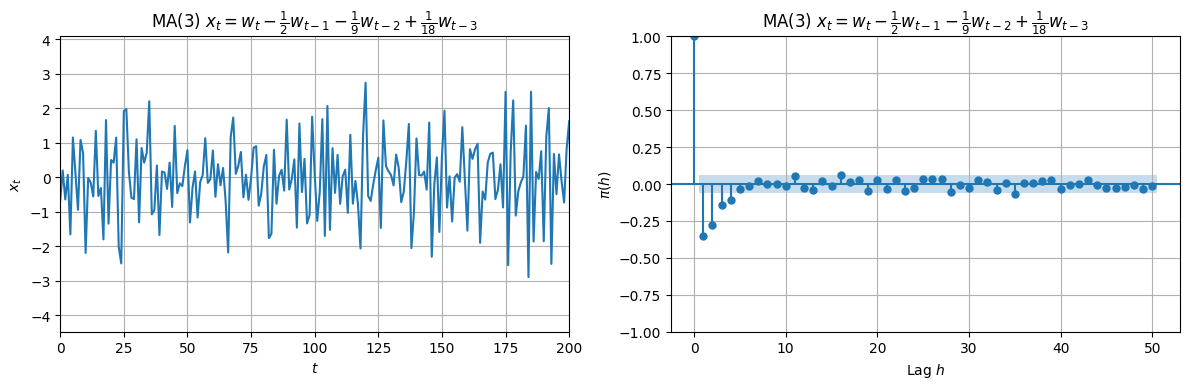

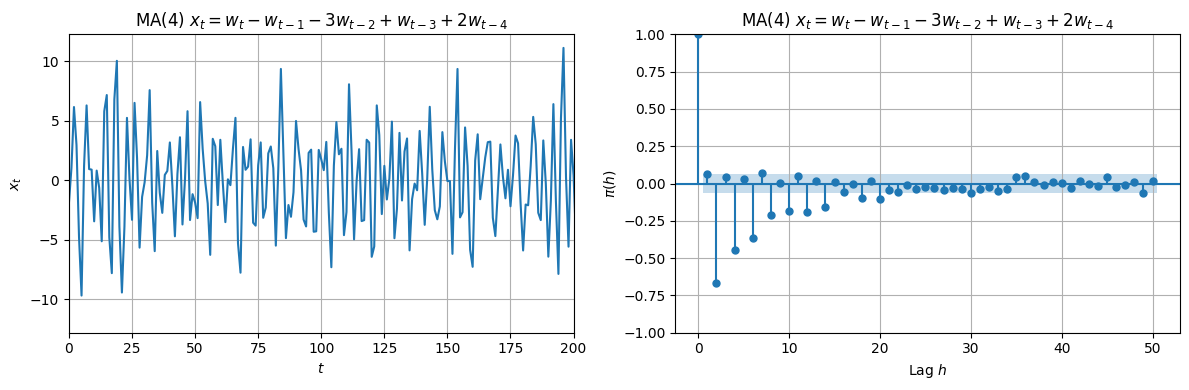

In [5]:
np.random.seed(42)
for ma_coeffs, formula in ma_parameters:
    plot_arma_process([1], ma_coeffs, formula, acf_or_pacf=False)

## ARMA process

ARMA(1,1) $x_t = -\frac{1}{7}x_{t-1}+ w_t-\frac{1}{2}w_{t-1}$
ARMA(1,1) AR roots: [-7.]
ARMA(1,1) is stationary: True
ARMA(1,1) MA roots: [2.]
ARMA(1,1) is invertible: True
ARMA(1,2) $x_t = -\frac{1}{7}x_{t-1}+ w_t-w_{t-1}-\frac{3}{4}w_{t-2}$
ARMA(1,2) AR roots: [-7.]
ARMA(1,2) is stationary: True
ARMA(1,2) MA roots: [-2.          0.66666667]
ARMA(1,2) is invertible: False
ARMA(1,3) $x_t = -\frac{1}{7}x_{t-1}+ w_t-\frac{1}{2}w_{t-1}-\frac{1}{9}w_{t-2}+\frac{1}{18}w_{t-3}$
ARMA(1,3) AR roots: [-7.]
ARMA(1,3) is stationary: True
ARMA(1,3) MA roots: [-3.  2.  3.]
ARMA(1,3) is invertible: True
ARMA(1,4) $x_t = -\frac{1}{7}x_{t-1}+ w_t-w_{t-1}-3w_{t-2}+w_{t-3}+2w_{t-4}$
ARMA(1,4) AR roots: [-7.]
ARMA(1,4) is stationary: True
ARMA(1,4) MA roots: [-1. -1.68731824e-08j -1. +1.68731824e-08j  0.5+0.00000000e+00j
  1. +0.00000000e+00j]
ARMA(1,4) is invertible: False
ARMA(2,1) $x_t = \frac{3}{2}x_{t-1}-\frac{1}{2}x_{t-2}+ w_t-\frac{1}{2}w_{t-1}$
ARMA(2,1) AR roots: [1. 2.]
ARMA(2,1) is stationary:

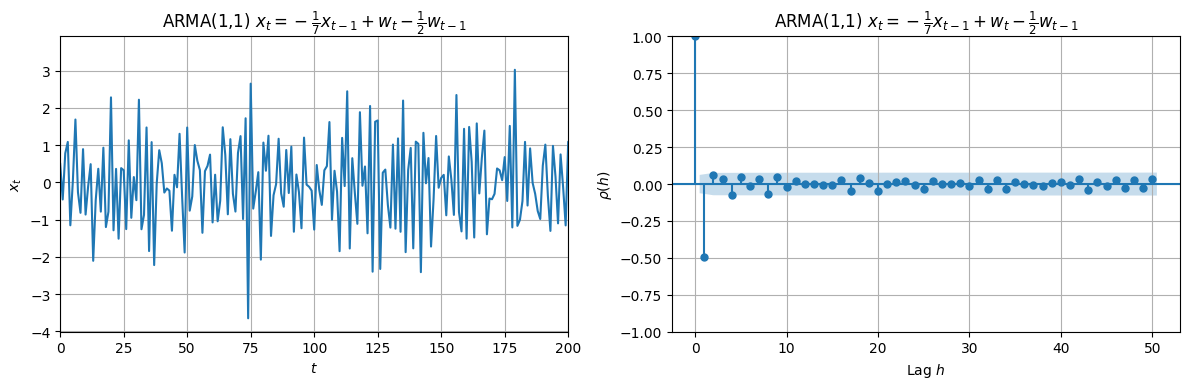

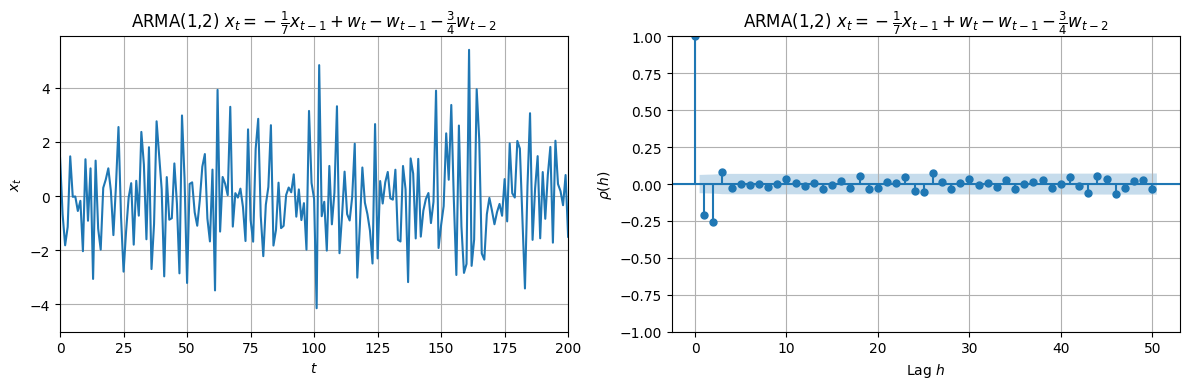

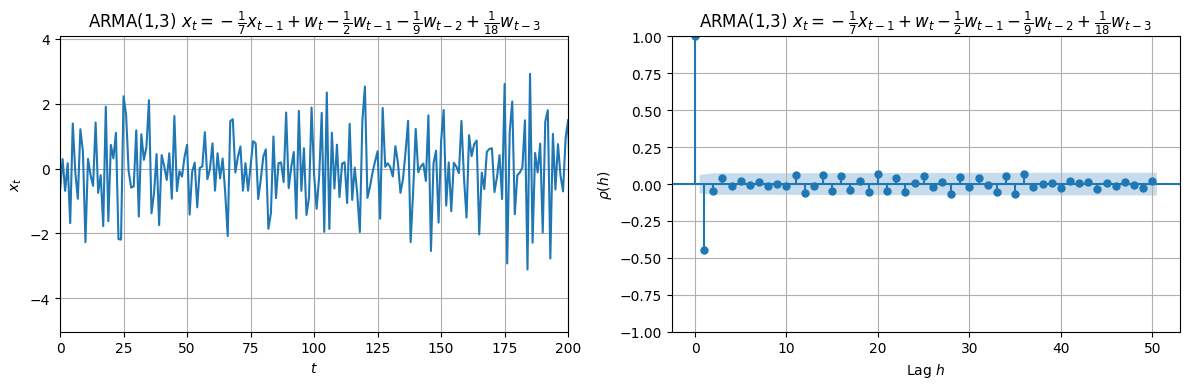

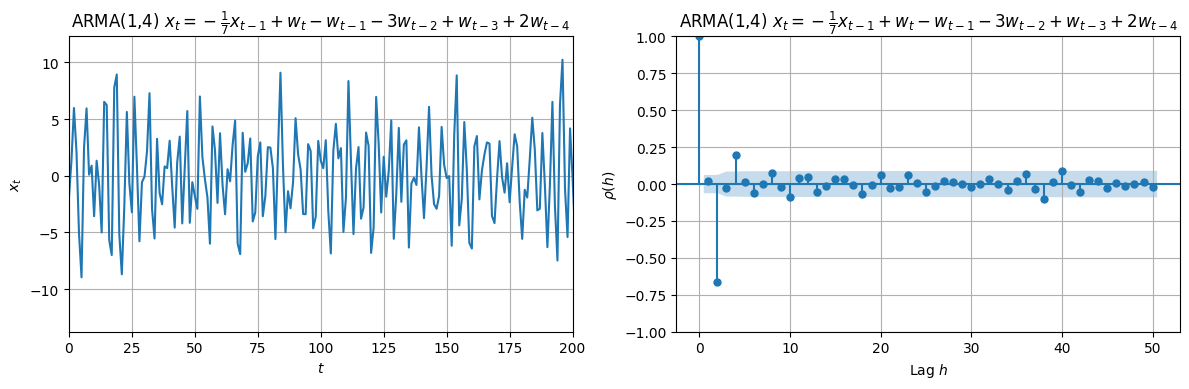

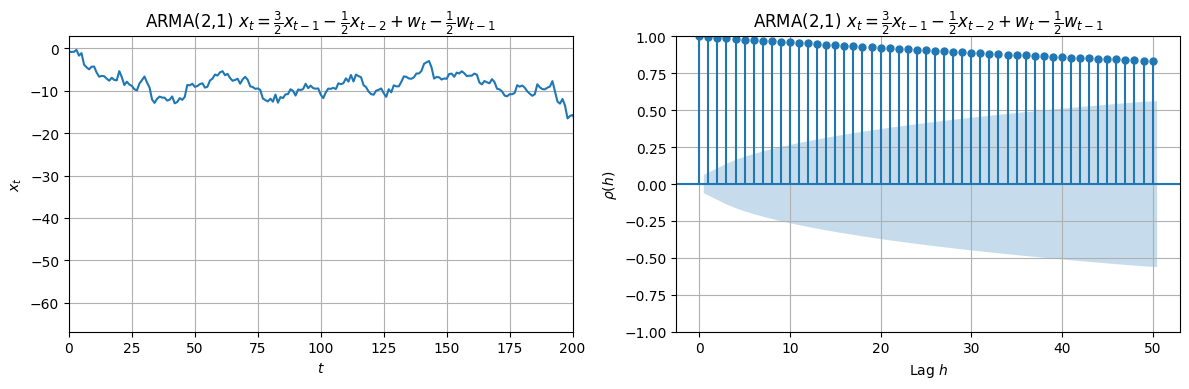

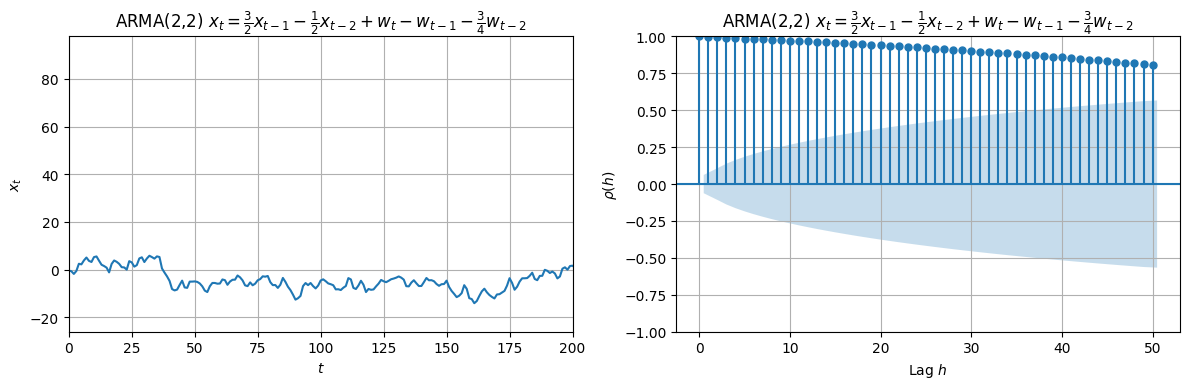

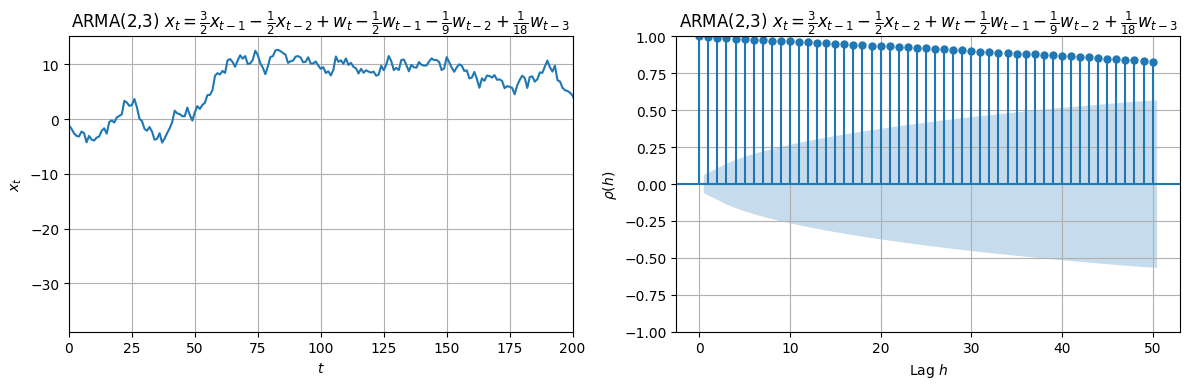

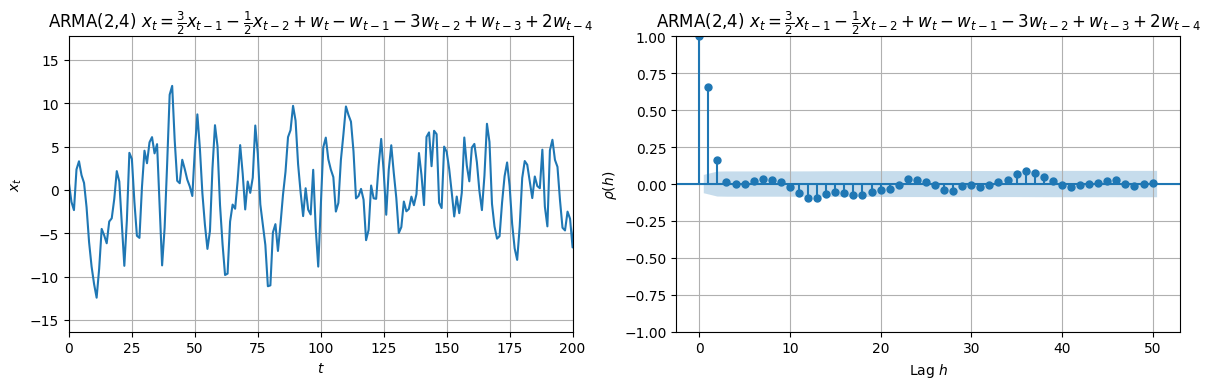

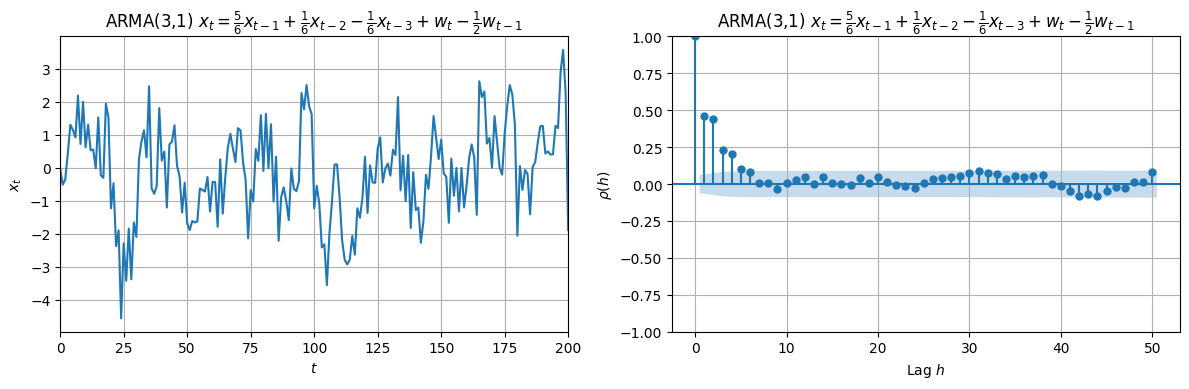

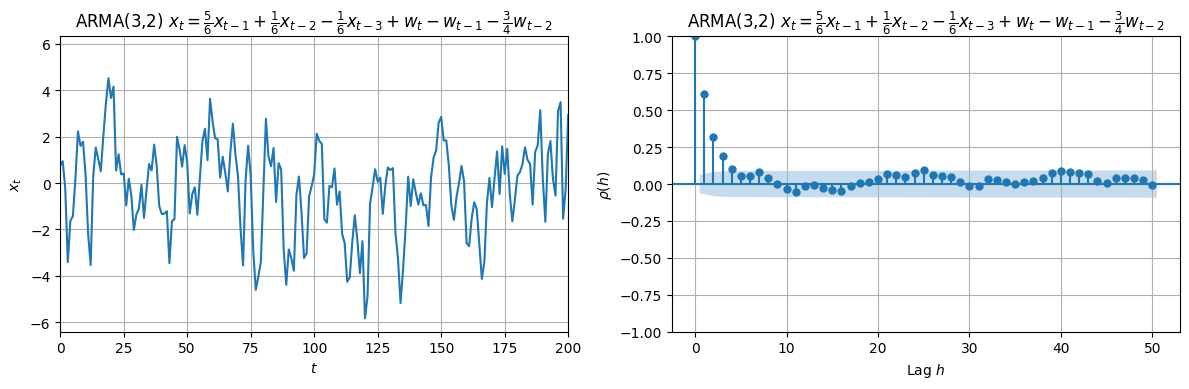

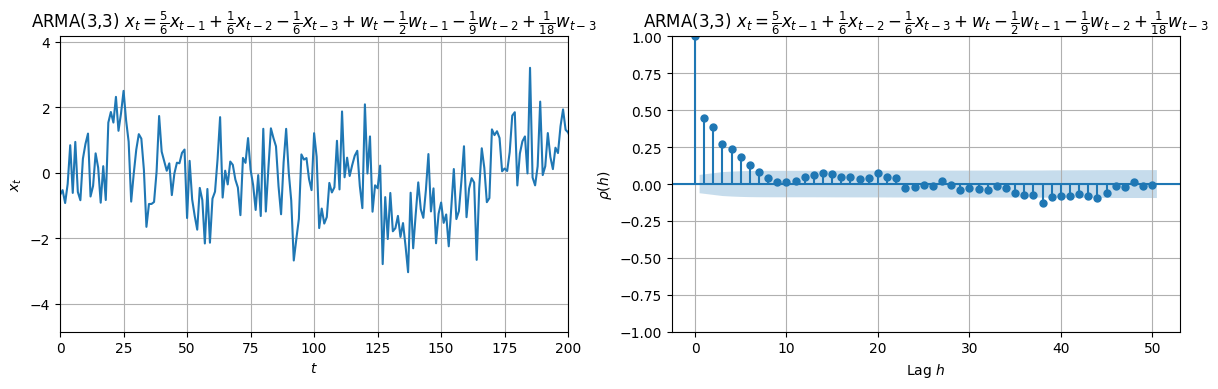

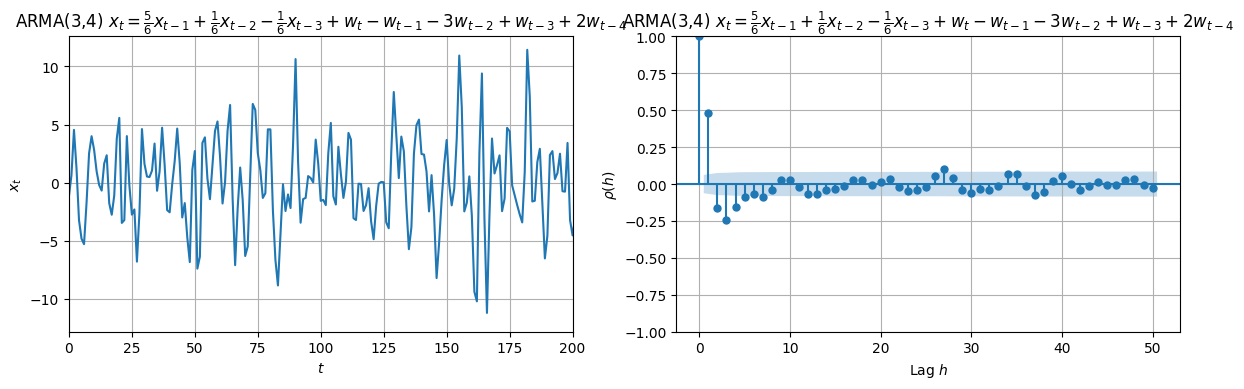

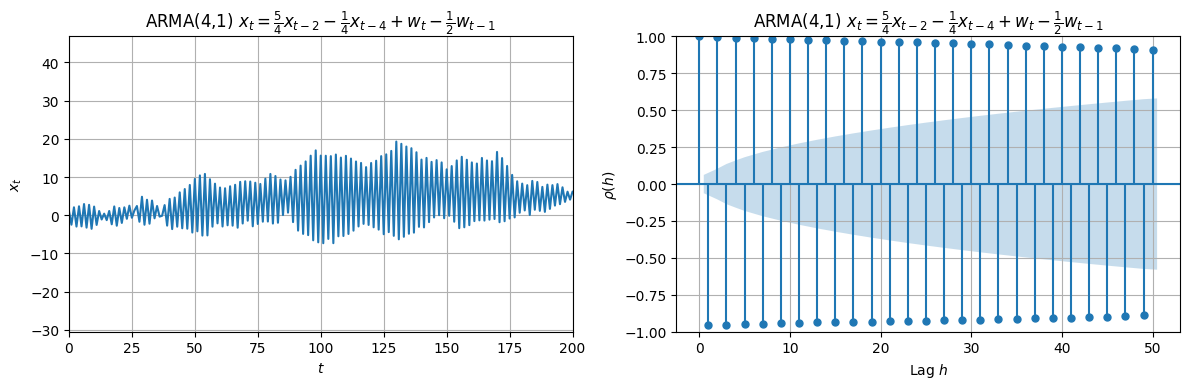

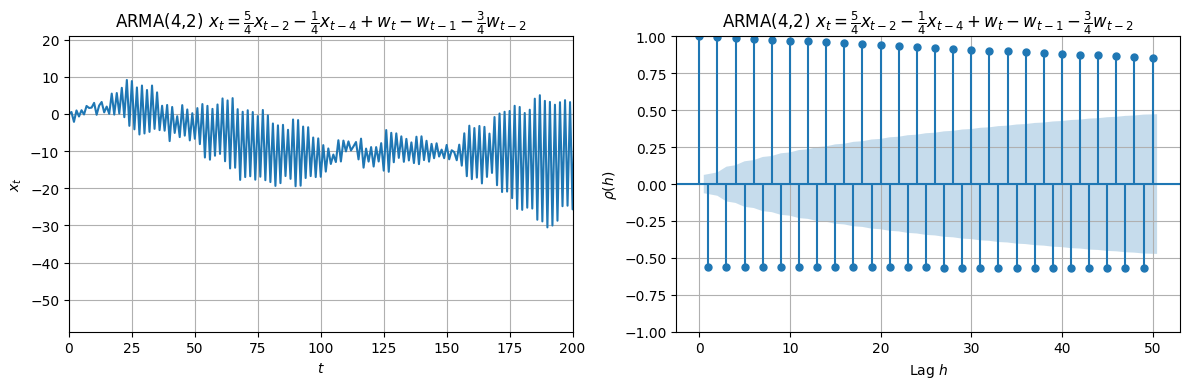

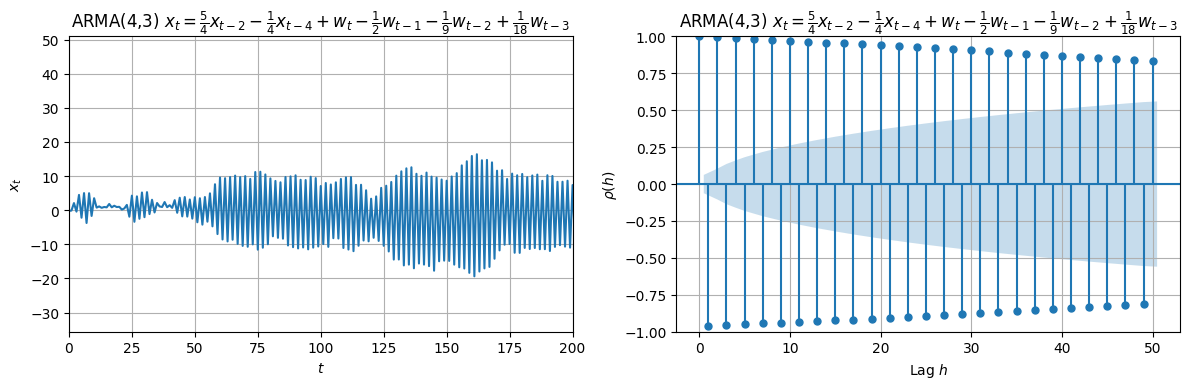

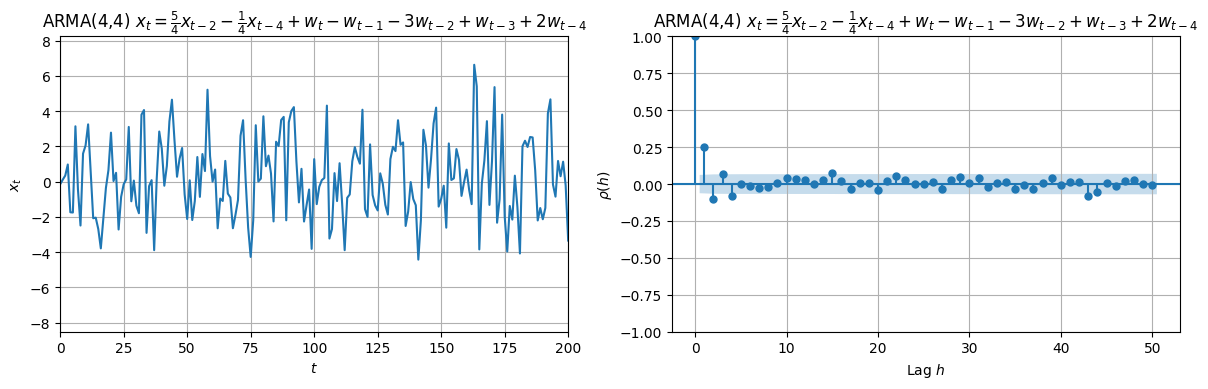

In [6]:
np.random.seed(42)
nsamples = 1000
arma_parameters = list(itertools.product(ar_parameters, ma_parameters))
for (ar_coeffs, ar_formula), (ma_coeffs, ma_formula) in arma_parameters:
    formula = f'${ar_formula.strip("$").split("w_t")[0]}{ma_formula.strip("$").split("=")[1]}$'
    plot_arma_process(ar_coeffs, ma_coeffs, formula, acf_or_pacf=True)

### Partial Autocorrelation Function (PACF)

ARMA(1,1) $x_t = -\frac{1}{7}x_{t-1}+ w_t-\frac{1}{2}w_{t-1}$
ARMA(1,1) AR roots: [-7.]
ARMA(1,1) is stationary: True
ARMA(1,1) MA roots: [2.]
ARMA(1,1) is invertible: True
ARMA(1,2) $x_t = -\frac{1}{7}x_{t-1}+ w_t-w_{t-1}-\frac{3}{4}w_{t-2}$
ARMA(1,2) AR roots: [-7.]
ARMA(1,2) is stationary: True
ARMA(1,2) MA roots: [-2.          0.66666667]
ARMA(1,2) is invertible: False
ARMA(1,3) $x_t = -\frac{1}{7}x_{t-1}+ w_t-\frac{1}{2}w_{t-1}-\frac{1}{9}w_{t-2}+\frac{1}{18}w_{t-3}$
ARMA(1,3) AR roots: [-7.]
ARMA(1,3) is stationary: True
ARMA(1,3) MA roots: [-3.  2.  3.]
ARMA(1,3) is invertible: True
ARMA(1,4) $x_t = -\frac{1}{7}x_{t-1}+ w_t-w_{t-1}-3w_{t-2}+w_{t-3}+2w_{t-4}$
ARMA(1,4) AR roots: [-7.]
ARMA(1,4) is stationary: True
ARMA(1,4) MA roots: [-1. -1.68731824e-08j -1. +1.68731824e-08j  0.5+0.00000000e+00j
  1. +0.00000000e+00j]
ARMA(1,4) is invertible: False
ARMA(2,1) $x_t = \frac{3}{2}x_{t-1}-\frac{1}{2}x_{t-2}+ w_t-\frac{1}{2}w_{t-1}$
ARMA(2,1) AR roots: [1. 2.]
ARMA(2,1) is stationary:

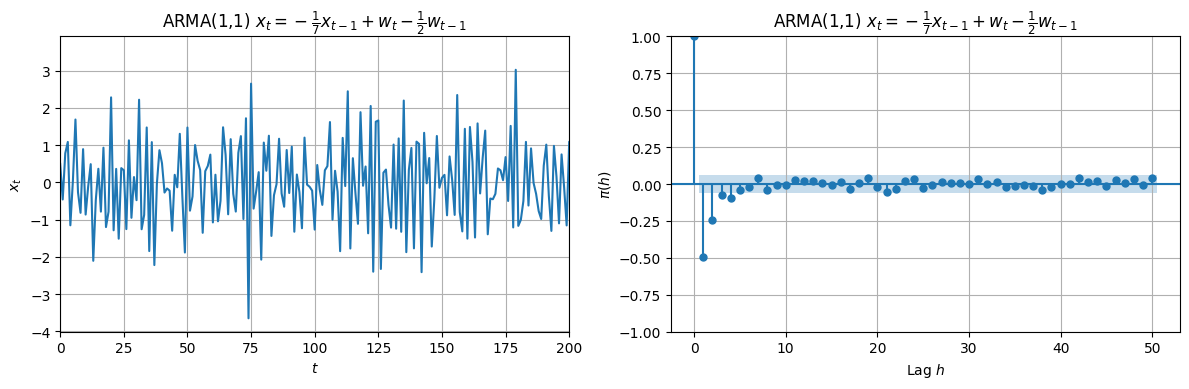

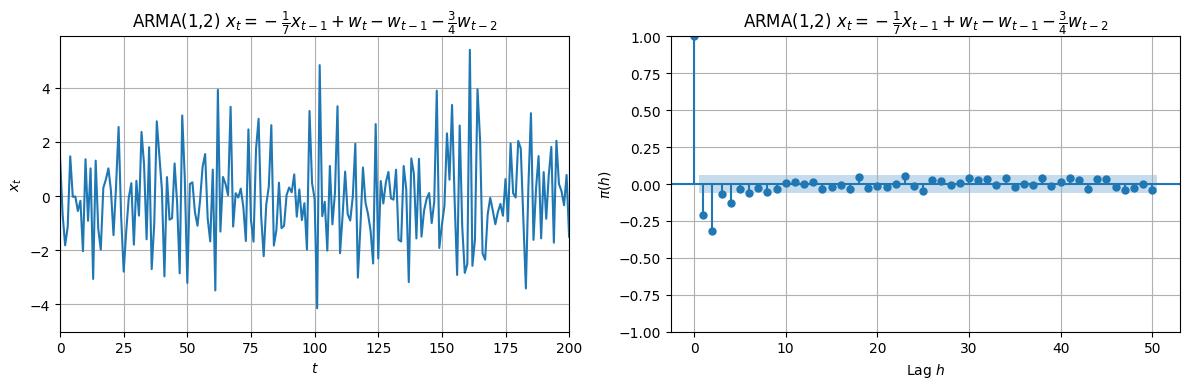

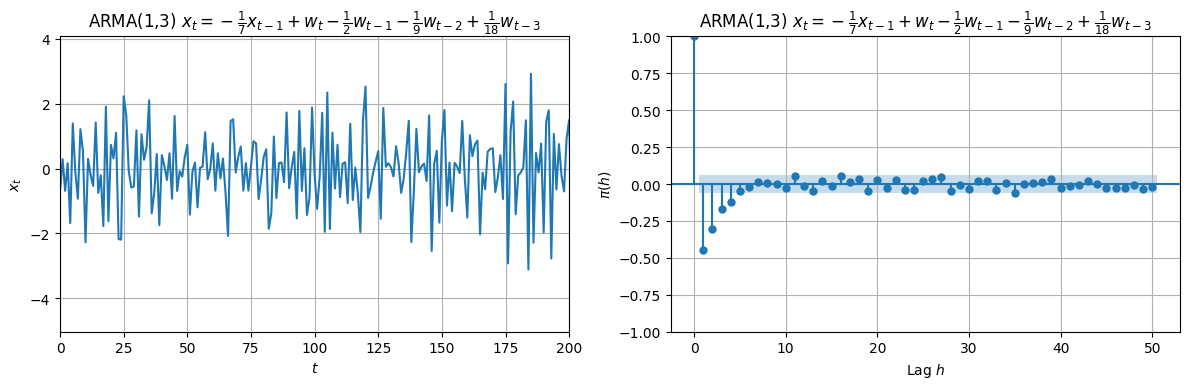

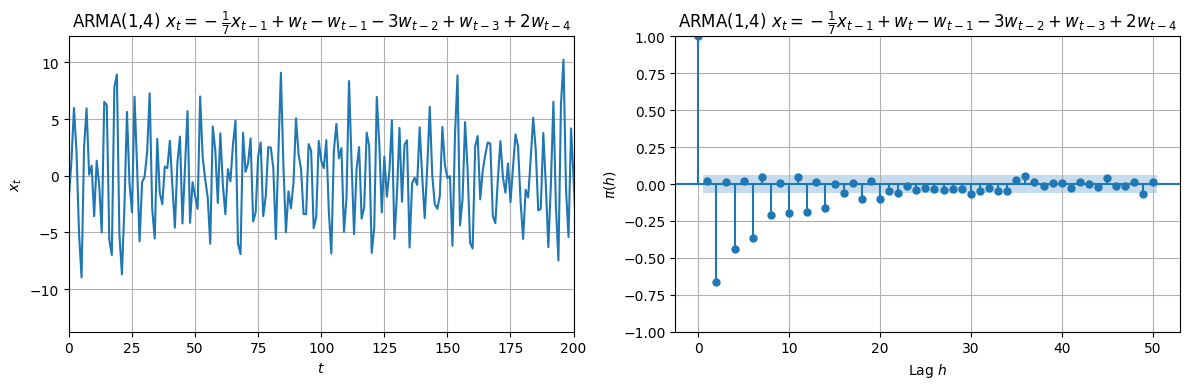

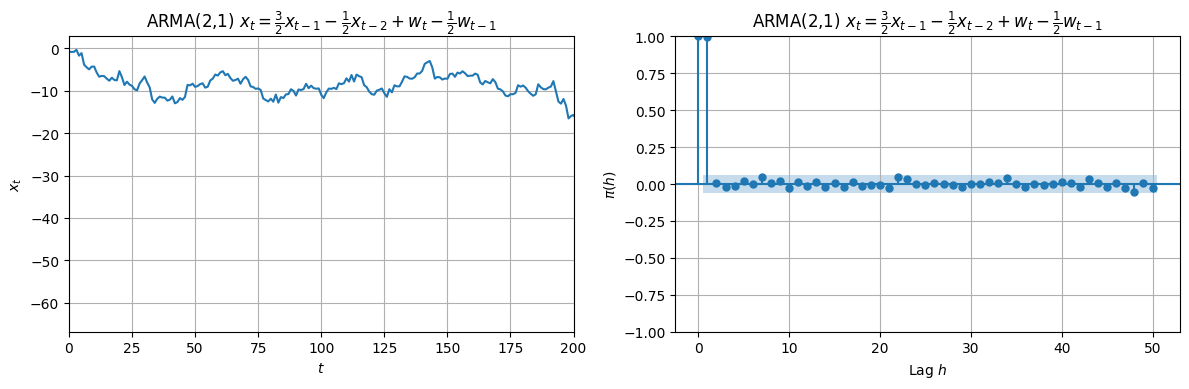

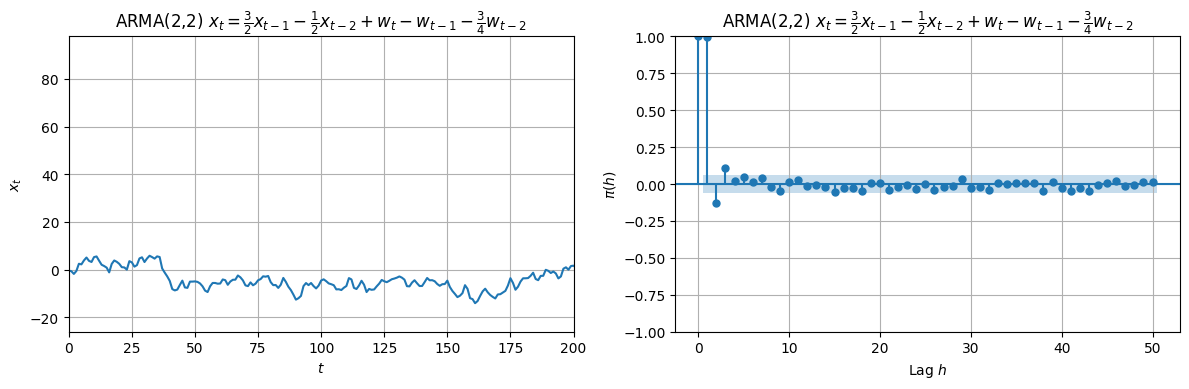

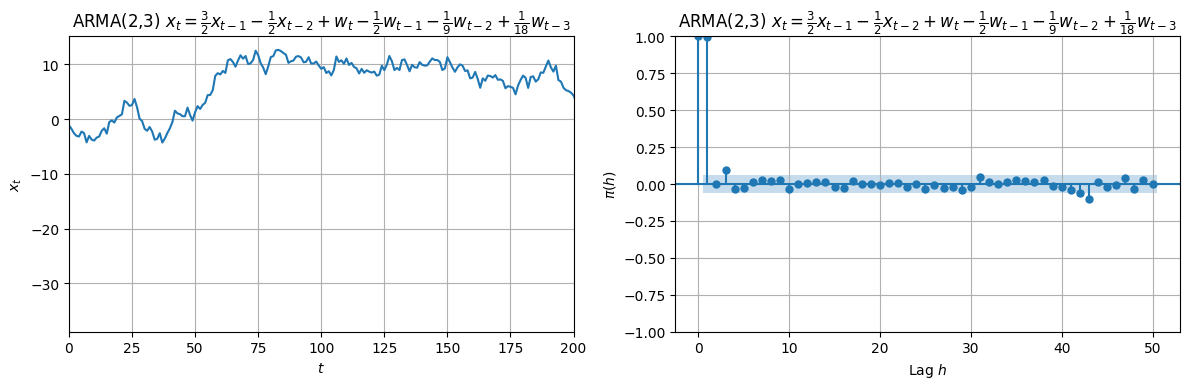

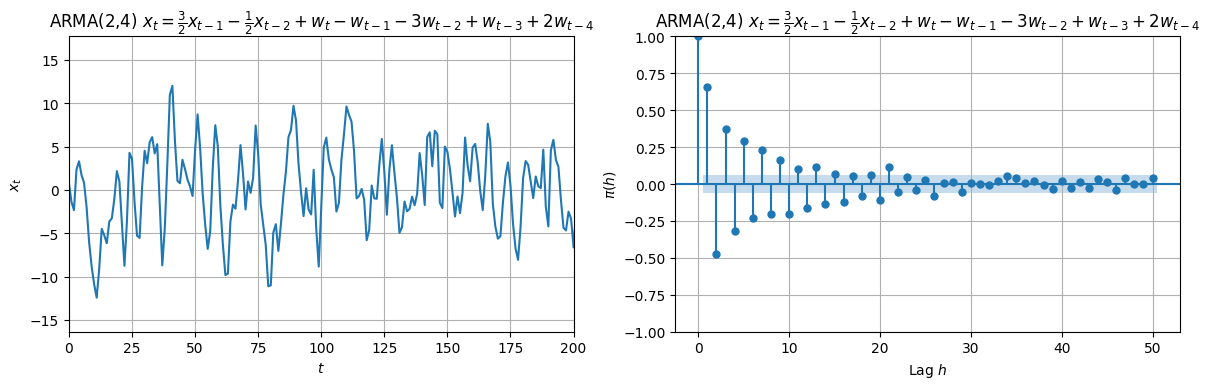

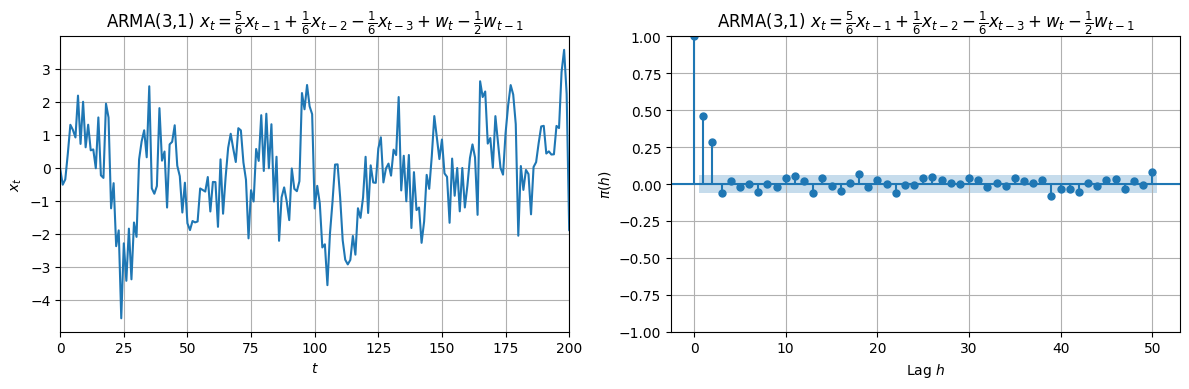

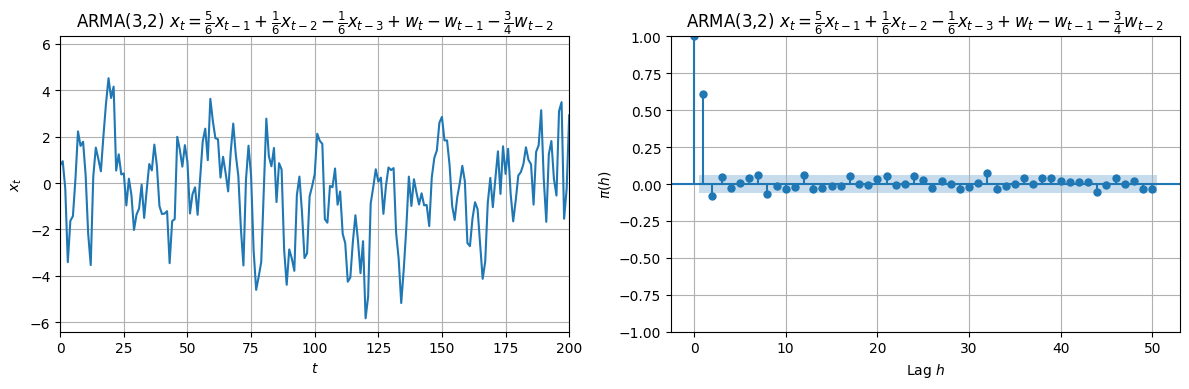

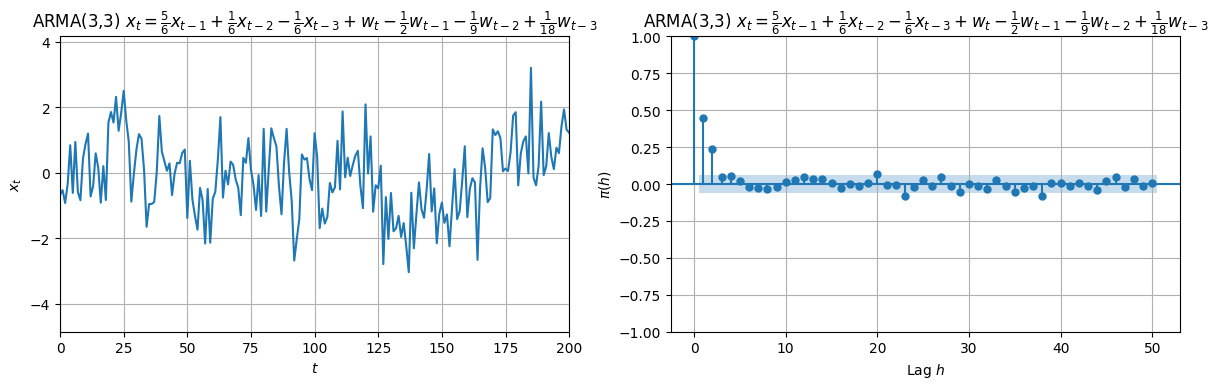

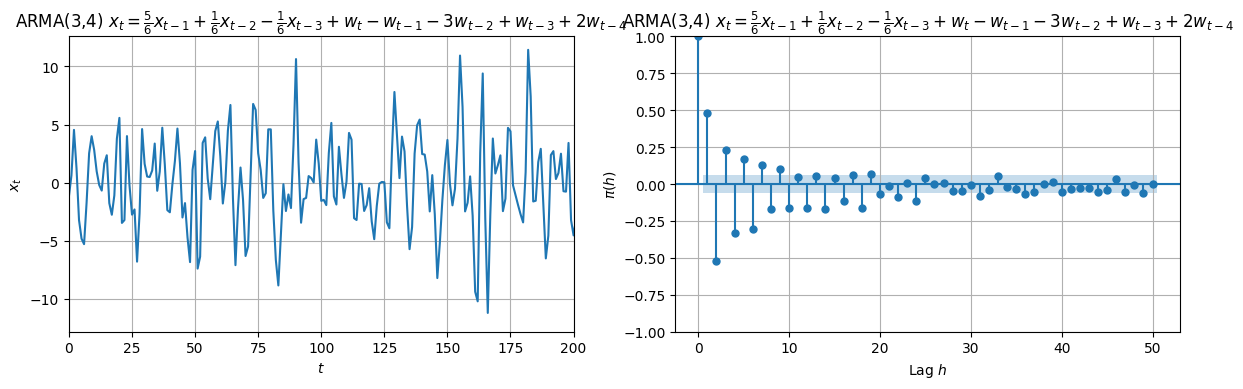

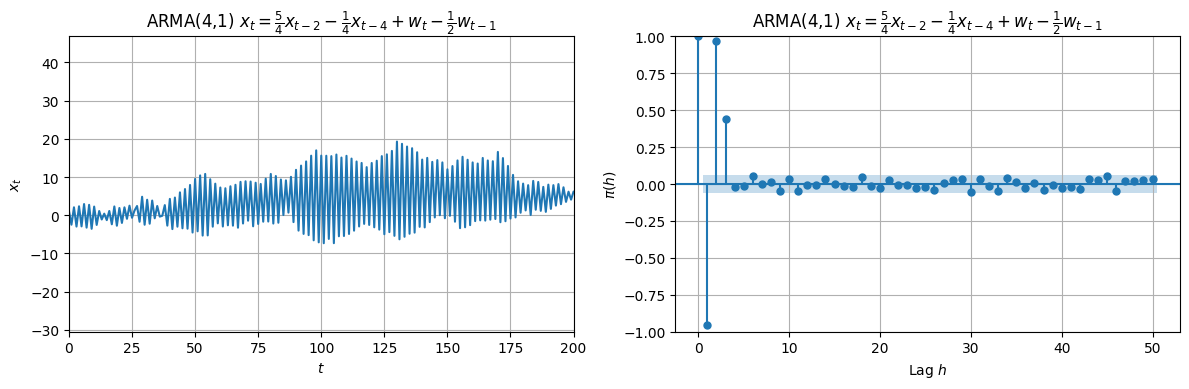

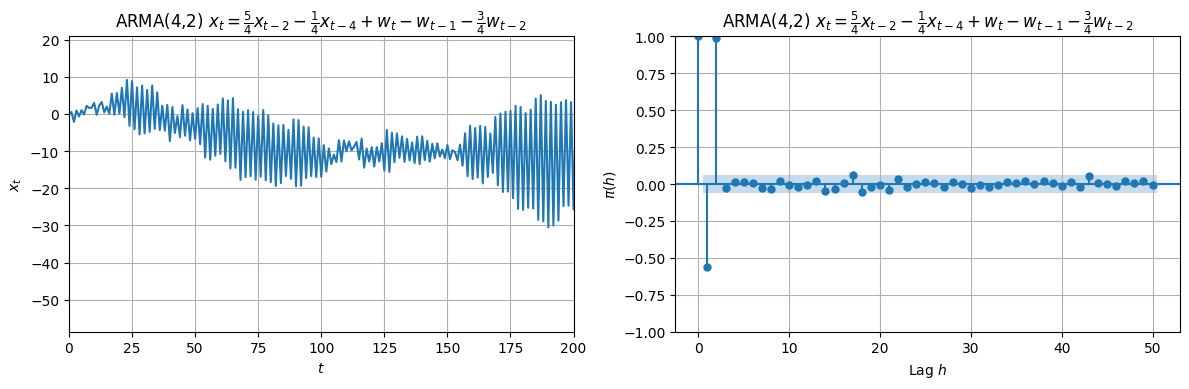

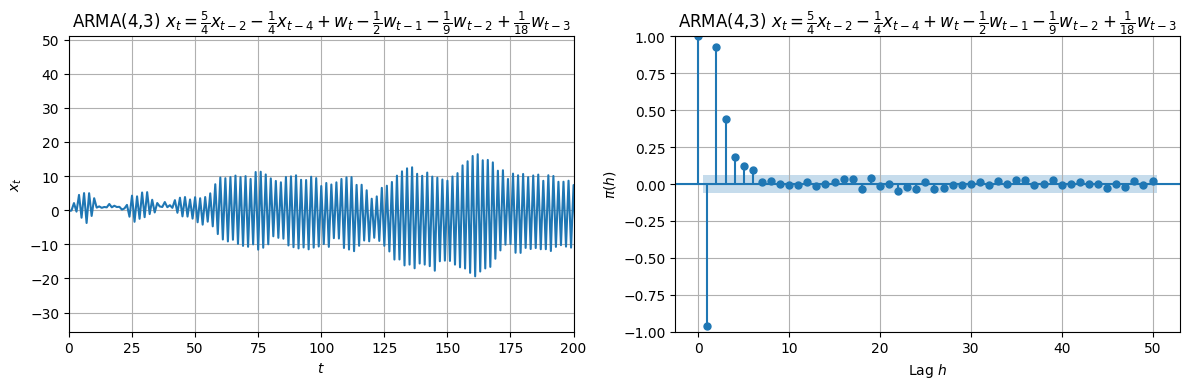

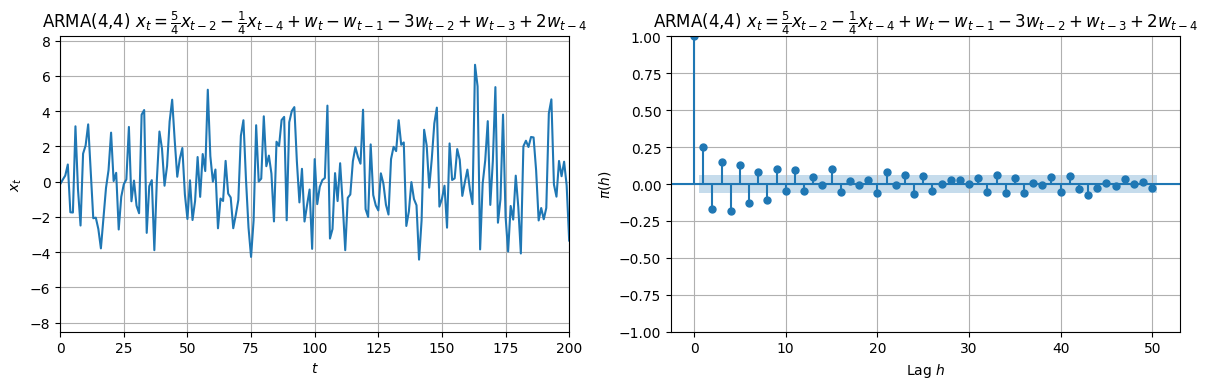

In [7]:
np.random.seed(42)
for (ar_coeffs, ar_formula), (ma_coeffs, ma_formula) in arma_parameters:
    formula = f'${ar_formula.strip("$").split("w_t")[0]}{ma_formula.strip("$").split("=")[1]}$'
    plot_arma_process(ar_coeffs, ma_coeffs, formula, acf_or_pacf=False)

## Example: Apple closing prices
### Stationarity

/home/david/hslu/time/notebooks/data.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period='5y')
[*********************100%***********************]  1 of 1 completed


Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.8426)
	- ZA: Stationary (p-value: 0.0000)


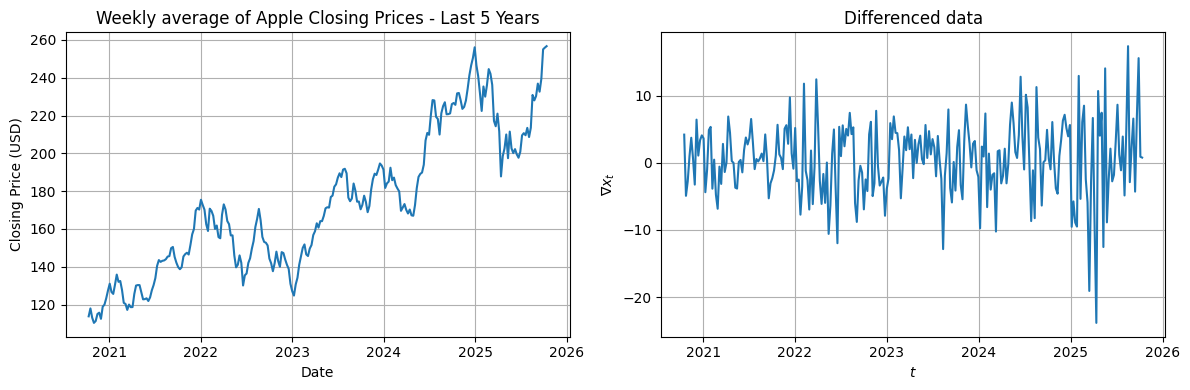

In [8]:
data = get_apple_5y()
data = data.resample('W').mean().ffill()
differenced_data = data['Close'].diff().dropna()
stationarity_tests(differenced_data)
fig, [ax1, ax2] = get_figure(ncols=2)
time_plot(
    x=data.index,
    y=data['Close'],
    title='Weekly average of Apple Closing Prices - Last 5 Years',
    xlabel='Date',
    ylabel='Closing Price (USD)',
    ax=ax1,
)
time_plot(
    x=differenced_data.index,
    y=differenced_data,
    title='Differenced data',
    ylabel='$\\nabla x_t$',
    ax=ax2,
)

### ACF and PACF

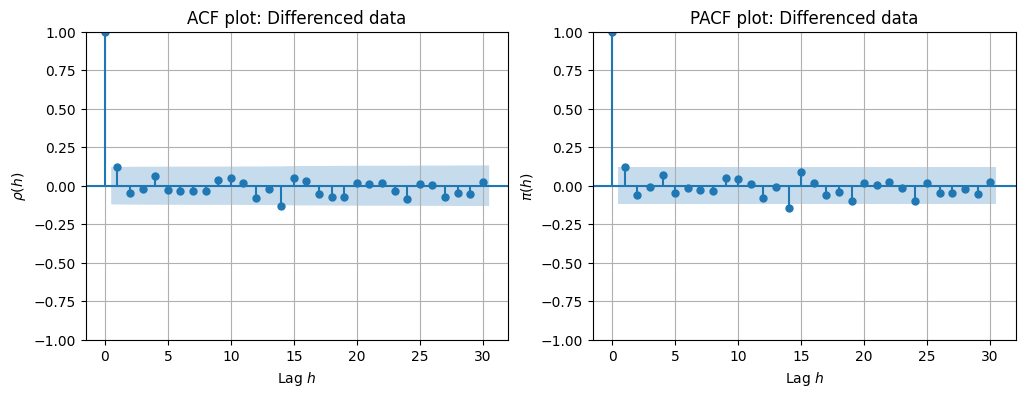

In [9]:
fig, [ax1, ax2] = get_figure(ncols=2)
acf_plot(differenced_data, 30, ax1, title="Differenced data")
pacf_plot(differenced_data, 30, ax2, title="Differenced data")

### Fit ARIMA model

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  262
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -813.935
Date:                Thu, 09 Oct 2025   AIC                           1631.871
Time:                        15:45:30   BIC                           1639.000
Sample:                    10-11-2020   HQIC                          1634.736
                         - 10-12-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1398      0.046      3.026      0.002       0.049       0.230
sigma2        29.9371      2.020     14.821      0.000      25.978      33.896
Ljung-Box (L1) (Q):                   0.03   Jarque-

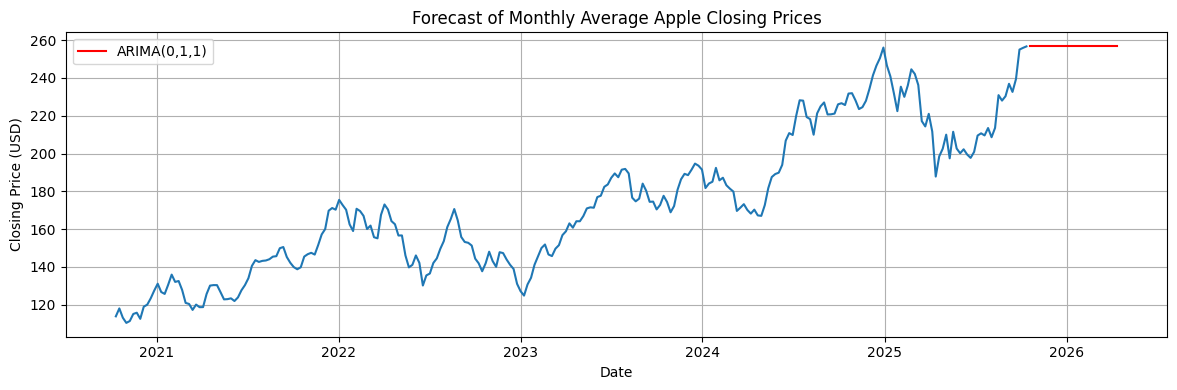

In [10]:
model = ARIMA(data['Close'], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
forecast_steps = 26
forecast = model_fit.forecast(steps=forecast_steps)

fig, ax = time_plot(
    x=data.index,
    y=data['Close'],
    title='Forecast of Monthly Average Apple Closing Prices',
    xlabel='Date',
    ylabel='Closing Price (USD)',
    return_fig=True,
)
ax.plot(forecast.index, forecast, label="ARIMA(0,1,1)", color='red')
ax.legend()

## Example Swiss temperatures
### Stationarity

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9923)
	- ZA: Stationary (p-value: 0.0127)


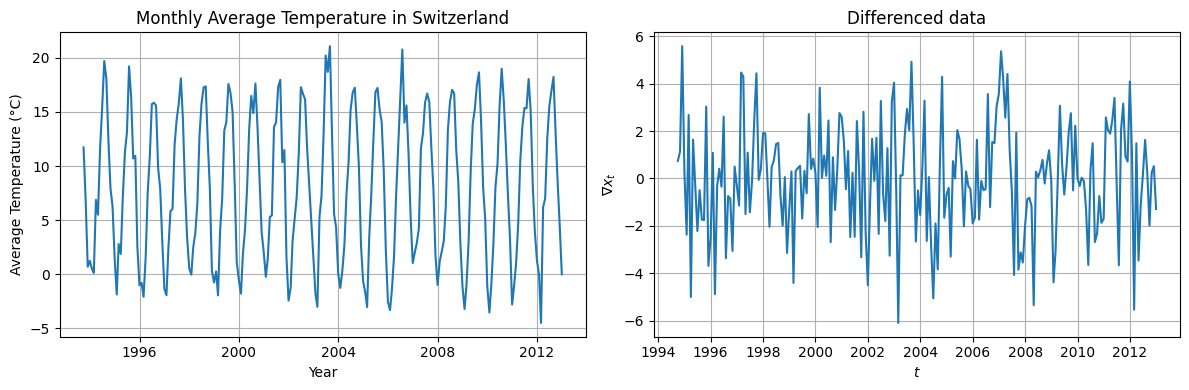

In [11]:
data = get_switzerland_temperature()
data = data.set_index('dt')
data = data.asfreq('ME')
differenced_data = data['AverageTemperature'].diff(12).dropna()
stationarity_tests(differenced_data)
fig, [ax1, ax2] = get_figure(ncols=2)
time_plot(
    x=data.index,
    y=data['AverageTemperature'],
    title='Monthly Average Temperature in Switzerland',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    ax=ax1,
)
time_plot(
    x=differenced_data.index,
    y=differenced_data,
    title='Differenced data',
    ylabel='$\\nabla x_t$',
    ax=ax2,
)

### ACF and PACF

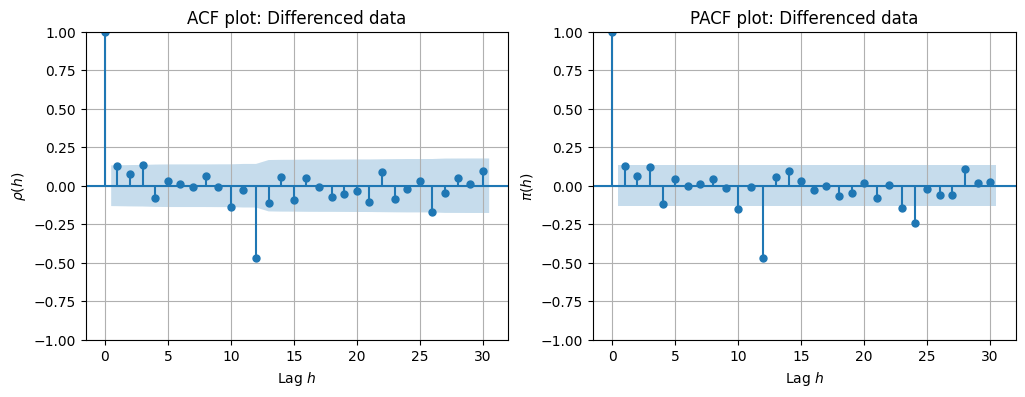

In [12]:
fig, [ax1, ax2] = get_figure(ncols=2)
acf_plot(differenced_data, 30, ax1, title="Differenced data")
pacf_plot(differenced_data, 30, ax2, title="Differenced data")

### Fit ARIMA model

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  232
Model:             ARIMA(1, 1, 0, 12)   Log Likelihood                -463.158
Date:                Thu, 09 Oct 2025   AIC                            930.316
Time:                        15:45:32   BIC                            937.104
Sample:                    09-30-1993   HQIC                           933.057
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5052      0.062     -8.137      0.000      -0.627      -0.383
sigma2         3.8828      0.372     10.430      0.000       3.153       4.612
Ljung-Box (L1) (Q):                   3.55   Jarque-

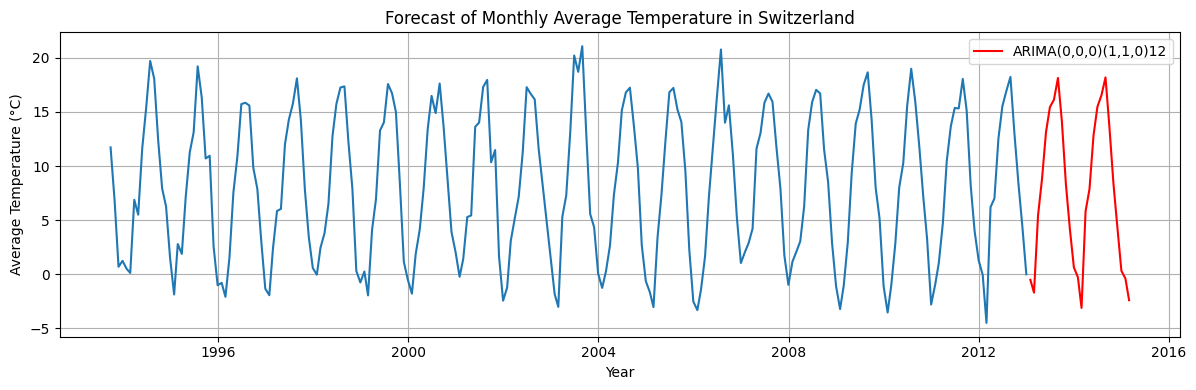

In [13]:
model = ARIMA(
    data['AverageTemperature'], 
    order=(0,0,0),
    seasonal_order=(1,1,0,12),
)
model_fit = model.fit()
print(model_fit.summary())
forecast_steps = 26
forecast = model_fit.forecast(steps=forecast_steps)

fig, ax = time_plot(
    x=data.index,
    y=data['AverageTemperature'],
    title='Forecast of Monthly Average Temperature in Switzerland',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    return_fig=True,
)
ax.plot(forecast.index, forecast, label="ARIMA(0,0,0)(1,1,0)12", color='red')
ax.legend()